## **Biodata**
Nama        : Nabil Muhyiddin

Kelompok    : 37

Universitas : Universitas Gadjah Mada

# **1. Mengimpor Library**

Mengimpor modul-modul yang dibutuhkan
- pandas untuk manipulasi data
- numpy untuk operasi numerik
- sklearn untuk algoritma Machine Learning dan evaluasi model
-  matplotlib dan seaborn untuk visualisasi data.

In [235]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# Mengunduh dataset dari UCI Repository
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv

--2024-06-28 10:49:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ai4i2020.csv.19’

ai4i2020.csv.19         [   <=>              ] 509.81K   788KB/s    in 0.6s    

2024-06-28 10:49:09 (788 KB/s) - ‘ai4i2020.csv.19’ saved [522048]



In [237]:
# Memuat dataset
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# **2. Kategarisasi Variabel**

Menggunakan LabelEncoder untuk mengkodekan variabel kategorikal 'Product ID' menjadi nilai numerik.

In [238]:
label_encoder = LabelEncoder()
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])

In [239]:
# One-hot encoding untuk kolom 'Product ID'
df = pd.get_dummies(df, columns=['Product ID'], drop_first=True)

# **3. Menentukan Fitur dan Label**

Memilih fitur-fitur yang akan digunakan untuk melatih model (X) dan label yang akan diprediksi (y).
Pada contoh ini, fitur-fitur yang dipilih adalah 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', dan 'Tool wear [min]'. Label yang dipilih adalah **'TWF'** yang mengindikasikan kegagalan alat. **Sesuai dengan objektive yang diinginkan pada kasus ini**

In [240]:
# Menentukan fitur dan label
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = df[features]
# Menggunakan label tool wear failure (TWF)
y = df['TWF']

# **4. Pembagian Data menjadi Set Pelatihan dan Pengujian**

Menggunakan train_test_split untuk membagi dataset menjadi data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test) dengan rasio 80:20.

In [241]:
# Pembagian data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
print(X.columns)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')


# **5. Normalisasi Data**

Menggunakan StandardScaler untuk melakukan normalisasi data numerik pada set pelatihan (X_train) dan set pengujian (X_test).

In [243]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **6. Pelatihan Model**

Membuat model Logistic Regression dan melatihnya menggunakan data pelatihan (X_train, y_train).

In [244]:
# Pelatihan model menggunakan Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **7. Evaluasi Model**

Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test).

In [245]:
# Evaluasi model
y_pred = model.predict(X_test)
# Prediksi probabilitas
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Set a new threshold
threshold = 0.45
y_pred_new = (y_pred_prob >= threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [246]:
print(f'Akurasi: {accuracy}')
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))

Akurasi: 0.9945
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000

ROC AUC Score: 0.9602815485168427


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **8. Visualisasi Confusion Matrix**

Menggunakan confusion_matrix dari sklearn untuk menampilkan Confusion Matrix sebagai heatmap menggunakan seaborn.

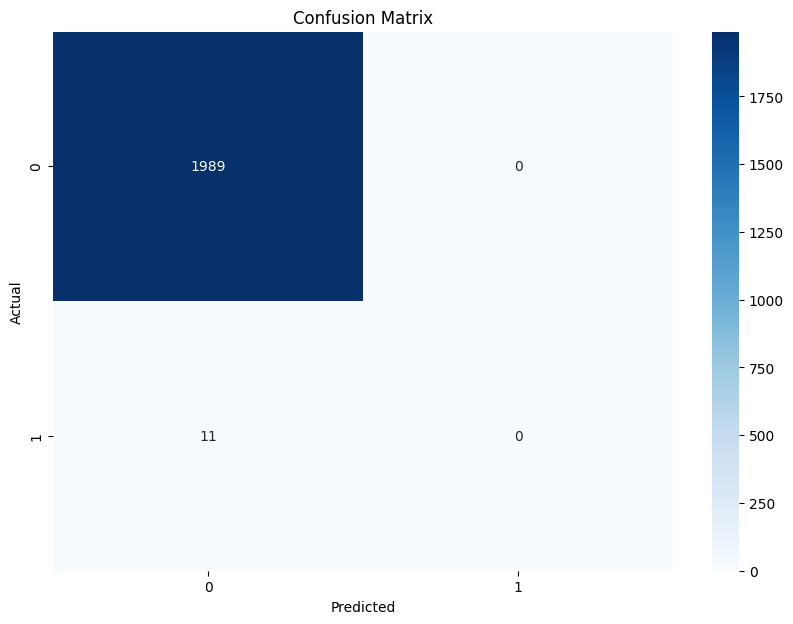

In [247]:
# Visualisasi confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **9. Plot ROC Curve**

Menggunakan roc_curve dari sklearn untuk menghitung False Positive Rate (FPR) dan True Positive Rate (TPR), kemudian memplot ROC Curve.

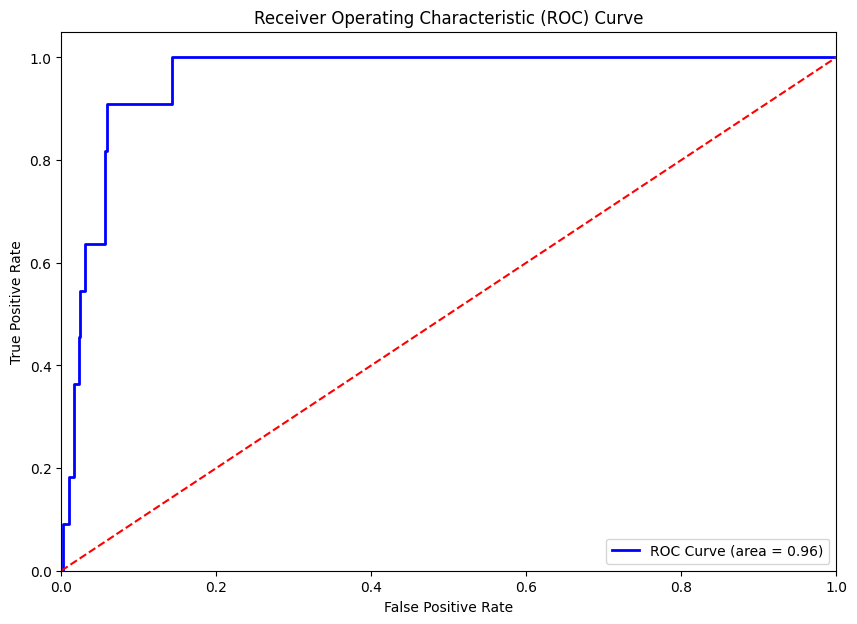

In [248]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()